<a href="https://colab.research.google.com/github/HesamB97/Computational-intelligence-course-homeworks/blob/main/Second%20Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import pandas 


(180, 180)


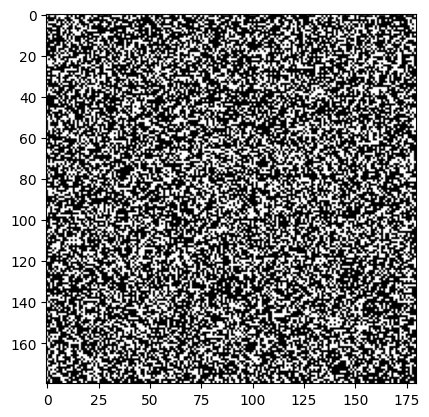

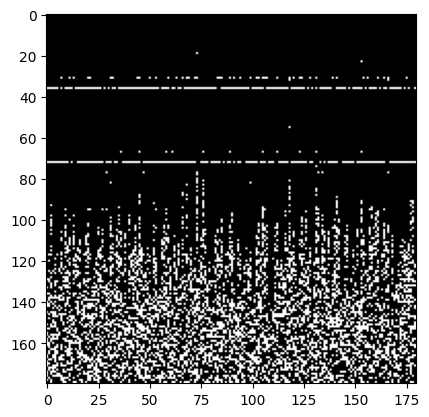

In [ ]:
class Hopfield:
  def __init__(self,x):
    self.x=x
    self.w=x.dot(x.T)-x.shape[1]*np.eye(x.shape[0])
    #print(self.w)
  def predict(self,x,max_iters=50):
    a_old=x.copy()
    a_new=x.copy()

    for j in range(max_iters):
      a_new=np.sign(self.w.dot(a_old))
      a_new[a_new==0]=1
      temp=a_new.copy()
      a_new=a_old.copy()
      

      for i in range(len(a_old)):
        if temp[i,0]!=a_old[i,0]:
          a_new[i,0]=temp[i,0]
          break
      
      if np.all(a_new==a_old):
        break
      a_old=a_new.copy()
    return a_new




def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output


def image_loader(name):
 img=cv2.resize(name,(180,180))
 _, thresh=cv2.threshold(img,128,255,0)
 image = img # Only for grayscale image
 image[image==-1]=0
 image=image*255

 noise = sp_noise(image,0.4)
 _, noise_img=cv2.threshold(noise,128,255,0)
 cv2.imwrite('sp_noise.jpg', noise_img)

 plt.show()
 plt.figure
 plt.imshow(noise_img, cmap='gray')
 hopin=noise_img/255
 hopin[hopin==0]=-1
 #x=np.array([[1,1,1,-1],[1,-1,-1,1]]).T
 return hopin

img1=cv2.imread('test5.jpg',0)
x=image_loader(img1)
print(x.shape)
hop=Hopfield(x)
out = hop.predict(np.array([x[:,0]]).T)

for j in range(x.shape[0]-1):
  new_column=hop.predict(np.array([x[:,j+1]]).T)
  out = np.append(out, new_column, axis=1)
  


#out=np.reshape(out,(100,100))
out[out==-1]=0
out=out*255
#print(noise_img)
#print(a.shape)

plt.show()
plt.figure
plt.imshow(out, cmap='gray')

98
138
186
(3, 900)


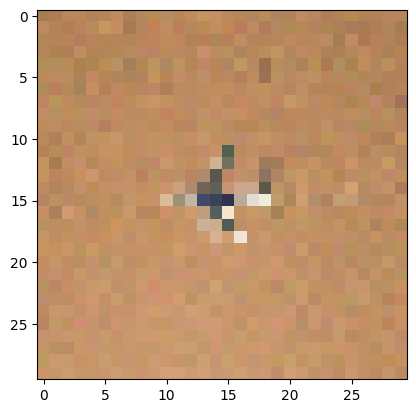

In [ ]:
img = cv2.imread('test6.jpg', cv2.IMREAD_UNCHANGED)
img=cv2.resize(img,(30,30))
b,g,r = (img[0, 0])

x=np.array([[b],[g],[r]])

for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    b,g,r = (img[i, j])
    new_column=np.array([[b],[g],[r]])
    x = np.append(x, new_column, axis=1)
x=np.delete(x,0,1)

print (r)
print (g)
print (b)
print(x.shape)
plt.show()
plt.figure
plt.imshow(img)



In [ ]:
img1 = cv2.imread('test6.jpg', cv2.IMREAD_UNCHANGED)
b,g,r = (img1[0, 0])
print (r)
print (g)
print (b)

74
139
179


In [ ]:
import numpy as np
import pandas 
from sklearn.preprocessing import normalize

alpha=0.6999
no_clusters=2
no_feature=3
x = x/x.sum(axis=0,keepdims=1)

w_i=np.random.rand(no_feature,no_clusters)

w_i = w_i/w_i.sum(axis=0,keepdims=1)
w_i_1=w_i[:,0]
w_i_2=w_i[:,1]
for k in range(1000):
  for i in range(img.shape[0]*img.shape[1]):
    D1=w_i_1-x[:,i]
    D1=np.linalg.norm(D1)
    D2=w_i_2-x[:,i]
    D2=np.linalg.norm(D2)
    print(i)
  
    if D1>D2:
     j=2
    else:
     j=1
     if j==1:
      w=w_i[:,j-1]+alpha*(x[:,i]-w_i[:,j-1])
      w1=w[:,np.newaxis]
      #print(w1.shape)
      w2=w_i[:,1]
      w2=w2[:,np.newaxis]
      #print(w2.shape)
     
     #w=np.array([[w1],[w2]])
     #print(i)
     

      w_i_1=w1
      w_i_2=w2
     else:
      w=w_i[:,j-1]+alpha*(x[:,i]-w_i[:,j-1])
      w2=w[:,np.newaxis]
      w2=w_i[0,:]
      w2=w2[:,np.newaxis]
      #w=np.array([[w],[wp]])
      w_i_1=w1
      w_i_2=w2
      #print(w_i.shape)
      #print(i)


          

   








Streaming output truncated to the last 5000 lines.
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
6